In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import os
import h5py

In [2]:
from reading_util import *
from plotting_util import *
import string_constants as sc

In [3]:
SM_samples = ['qcdSide']
#SM_samples = ['qcdSigExt']
BSM_samples = []
#BSM_samples = ['GtoWW15na', 'GtoWW20na', 'GtoWW25na', 'GtoWW30na', 'GtoWW35na', 'GtoWW40na', 'GtoWW45na', \
#              'GtoWW15br', 'GtoWW20br', 'GtoWW25br', 'GtoWW30br', 'GtoWW35br', 'GtoWW40br', 'GtoWW45br']
all_samples = SM_samples + BSM_samples

In [4]:
# read in data
input_data = {}
for n in all_samples:
    print(n)
    features, _ = read_dijet_features_to_recarray( os.path.join( sc.input_dir, sc.sample_loc[n] ) )
    input_data[n] = features


qcdSide
reading /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND
reading  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND
num files in dir: 2137
[--------------------]  0% - ETA:271.0 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_1000.h5 :  OSError('Unable to open file (file signature not found)',)
[--------------------]  0% - ETA:334.7 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_1076.h5 :  OSError('Unable to open file (file signature not found)',)
[--------------------]  0% - ETA:321.1 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_1091.h5 :  OSError('Unable to open file (bad object header version number)',)

Could not read file  /eos/project/d

[--------------------]  0% - ETA:378.2 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_2389.h5 :  IndexError('too many indices for array',)

Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_2398.h5 :  IndexError('too many indices for array',)
[--------------------]  0% - ETA:390.6 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_2476.h5 :  IndexError('too many indices for array',)
[--------------------]  0% - ETA:397.8 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_2535.h5 :  IndexError('too many indices for array',)
[--------------------]  0% - ETA:398.0 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd

[--------------------]  0% - ETA:399.8 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_2944.h5 :  IndexError('too many indices for array',)
[--------------------]  0% - ETA:399.8 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_2947.h5 :  IndexError('too many indices for array',)
[--------------------]  0% - ETA:399.4 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_2954.h5 :  IndexError('too many indices for array',)
[--------------------]  0% - ETA:399.5 h   
Could not read file  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_2964.h5 :  IndexError('too many indices for array',)
[--------------------]  0% - ETA:399.9 h   
Could not read file  /eo

In [6]:
for n in all_samples:
    print(n,': ',input_data[n].shape[0] / 1000. ,'K events')

qcdSide :  4082.129 K events


## plot dijet mass

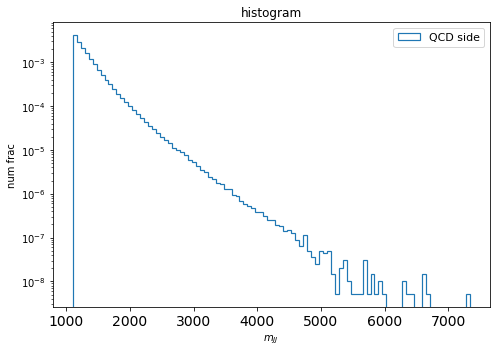

In [11]:
masses = [input_data[n]['mJJ'] for n in all_samples]
labels = [sc.sample_label[n] for n in all_samples]

_ = plot_hist(masses, xlabel=r'$m_{JJ}$', legend=labels, ylogscale=True)

## plot delta eta

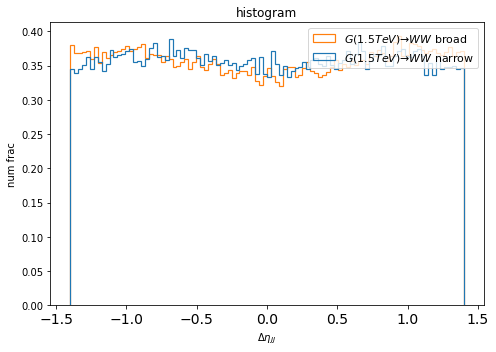

In [7]:
sample_subset = ['GtoWW15na','GtoWW15br']
deltaEta = [ input_data[n]['DeltaEtaJJ'] for n in sample_subset]
labels = [sc.sample_label[n] for n in sample_subset]

_ = plot_hist(deltaEta, xlabel=r'$\Delta\eta_{JJ}$', legend=labels, ylogscale=False)

## plot correlations single data sample

In [8]:
features, labels = read_dijet_features_to_recarray( os.path.join( sc.input_dir, sc.sample_loc['qcdSigExt'] ) )
input_data['qcdSigExt'] = features

reading  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_EXT
num files in dir: 3911
[--------------------]  0% - ETA: 29.2 h   Labels: [b'mJJ' b'j1Pt' b'j1Eta' b'j1Phi' b'j1M' b'j1E' b'j2Pt' b'j2M' b'j2E'
 b'DeltaEtaJJ' b'DeltaPhiJJ']

num files read in dir  /eos/project/d/dshep/TOPCLASS/DijetAnomaly/qcd_sqrtshatTeV_13TeV_PU40_EXT :  3911


In [9]:
sample_name = 'qcdSigExt'
sample_data = input_data[sample_name]

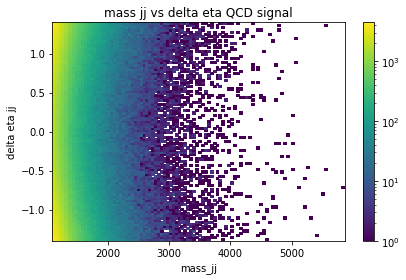

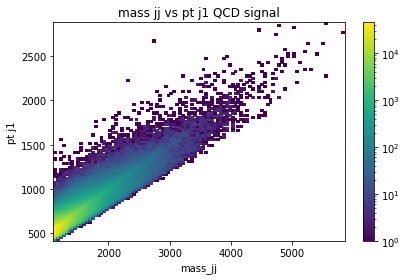

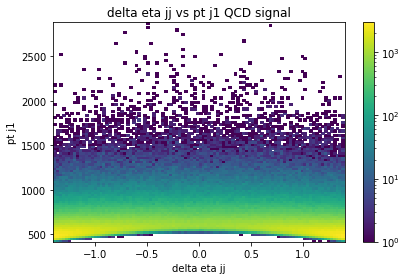

In [10]:
plot_hist_2d(sample_data['mJJ'],sample_data['DeltaEtaJJ'],'mass_jj','delta eta jj', 'mass jj vs delta eta QCD signal')
plot_hist_2d(sample_data['mJJ'],sample_data['j1Pt'],'mass_jj','pt j1', 'mass jj vs pt j1 QCD signal')
plot_hist_2d(sample_data['DeltaEtaJJ'],sample_data['j1Pt'],'delta eta jj','pt j1', 'delta eta jj vs pt j1 QCD signal')

In [11]:
file_name = '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_data/qcd_sqrtshatTeV_13TeV_PU40_SIDEBAND_concat_1.3M.h5'
input_file = os.path.join(sc.input_dir, file_name)
evts = get_dijet_features_from_file( input_file )

NameError: name 'input_dir' is not defined

In [ ]:
plot_hist_2d(evts[:,0],evts[:,9],'mass_jj','delta eta jj', 'mass jj vs delta eta QCD sideband')
plot_hist_2d(evts[:,0],evts[:,1],'mass_jj','pt j1', 'mass jj vs pt j1 QCD sideband')
plot_hist_2d(evts[:,9],evts[:,1],'delta eta jj','pt j1', 'delta eta jj vs pt j1 QCD sideband')